# Imports

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import re

# Data

In [ ]:
data_path = 'dataset/sampled_data.csv'

df = pd.read_csv(data_path)

In [60]:
df.head()

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity,type_str,type_set
0,2024-HDE8AM,"{เสียงรบกวน,ถนน}",กองโครงการสายอากาศเป็นสายใต้ดิน2 ฝ่ายบริหารโคร...,แผ่นเหล็กปิดถนนขั่วคราวปิดไม่เรียบร้อย เกิดเสี...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.65690,13.76710",968 ถนน รามคำแหง หัวหมาก เขตบางกะปิ กรุงเทพมหา...,หัวหมาก,บางกะปิ,กรุงเทพมหานคร,2024-07-06 01:26:42.908463+00,เสร็จสิ้น,NaN,0,2024-11-06 02:00:11.876998+00,"เสียงรบกวน,ถนน","{'ถนน', 'เสียงรบกวน'}"
1,2023-E4NQUH,{ถนน},"เขตประเวศ,ฝ่ายโยธา เขตประเวศ",https://youtu.be/7ly_Zgk-8Co\n\nดูจบแล้วน่าสนใ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.69469,13.71739",33 เฉลิมพระเกีรยติ ร.9 ซอย 81 แขวงประเวศ เขต ป...,ประเวศ,ประเวศ,กรุงเทพมหานคร,2023-05-02 14:35:58.588305+00,เสร็จสิ้น,NaN,0,2023-07-14 07:33:28.60558+00,ถนน,{'ถนน'}
2,2024-VR89N3,{ถนน},"เขตบางซื่อ,สำนักการโยธา กทม.,สำนักงานวิศวกรรมท...",พบปัญหายางมะตอยที่ราดบนสะพานหลุดล่อนทำให้เกิดร...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53901,13.83039",51 ถ. รัชดาภิเษก แขวง วงศ์สว่าง เขตบางซื่อ กรุ...,วงศ์สว่าง,บางซื่อ,กรุงเทพมหานคร,2024-05-25 10:23:11.112647+00,กำลังดำเนินการ,NaN,0,2024-05-26 04:32:04.804649+00,ถนน,{'ถนน'}
3,2PCJX4,"{แสงสว่าง,ถนน}","เขตภาษีเจริญ,การไฟฟ้านครหลวง เขตบางขุนเทียน,กา...",ปัญหา: หน้าบ้านเลขที่ 8/65 ภายในหมู่บ้านดังกล่...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.44173,13.70965",2 ซอย เทอดไท 77 แยก 3 แขวงบางหว้า เขตภาษีเจริญ...,บางหว้า,ภาษีเจริญ,จังหวัดกรุงเทพมหานคร,2024-09-04 12:33:28.154814+00,กำลังดำเนินการ,NaN,0,2024-09-11 08:23:33.148189+00,"แสงสว่าง,ถนน","{'ถนน', 'แสงสว่าง'}"
4,2024-E7E2VX,"{ร้องเรียน,ทางเท้า}","เขตวัฒนา,ฝ่ายเทศกิจ เขตวัฒนา,ฝ่ายสิ่งแวดล้อมฯ ...",ทางเท้า หน้าร้านอาหาร ซอยสุขุมวิท23 สกปรก โสโค...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.56279,13.73644",4 7 ซ. สุขุมวิท 23 แขวงคลองเตยเหนือ เขตวัฒนา ก...,คลองเตยเหนือ,วัฒนา,กรุงเทพมหานคร,2024-04-26 01:40:43.834504+00,เสร็จสิ้น,NaN,0,2024-06-20 09:47:08.276558+00,"ร้องเรียน,ทางเท้า","{'ทางเท้า', 'ร้องเรียน'}"


In [61]:
df.shape

(100000, 18)

In [62]:
col_names = df.columns.tolist()
col_names

['ticket_id',
 'type',
 'organization',
 'comment',
 'photo',
 'photo_after',
 'coords',
 'address',
 'subdistrict',
 'district',
 'province',
 'timestamp',
 'state',
 'star',
 'count_reopen',
 'last_activity',
 'type_str',
 'type_set']

In [63]:
col_to_drop = ['ticket_id',
 'type',
 'organization',
 'photo',
 'photo_after',
 'coords',
 'address',
 'subdistrict',
 'district',
 'province',
 'timestamp',
 'state',
 'star',
 'count_reopen',
 'last_activity',
 'type_set']

df.drop(columns=col_to_drop, inplace=True)
df.head()

,comment,type_str
0,แผ่นเหล็กปิดถนนขั่วคราวปิดไม่เรียบร้อย เกิดเสี...,"เสียงรบกวน,ถนน"
1,https://youtu.be/7ly_Zgk-8Co\n\nดูจบแล้วน่าสนใ...,ถนน
2,พบปัญหายางมะตอยที่ราดบนสะพานหลุดล่อนทำให้เกิดร...,ถนน
3,ปัญหา: หน้าบ้านเลขที่ 8/65 ภายในหมู่บ้านดังกล่...,"แสงสว่าง,ถนน"
4,ทางเท้า หน้าร้านอาหาร ซอยสุขุมวิท23 สกปรก โสโค...,"ร้องเรียน,ทางเท้า"


In [64]:
df.shape

(100000, 2)

In [65]:
df.dropna(inplace=True)
df.shape

(99024, 2)

In [66]:
df['type'] = df['type_str'].apply(lambda x: x.split(','))
df.drop(columns=['type_str'], inplace=True)
df.head()

,comment,type
0,แผ่นเหล็กปิดถนนขั่วคราวปิดไม่เรียบร้อย เกิดเสี...,"[เสียงรบกวน, ถนน]"
1,https://youtu.be/7ly_Zgk-8Co\n\nดูจบแล้วน่าสนใ...,[ถนน]
2,พบปัญหายางมะตอยที่ราดบนสะพานหลุดล่อนทำให้เกิดร...,[ถนน]
3,ปัญหา: หน้าบ้านเลขที่ 8/65 ภายในหมู่บ้านดังกล่...,"[แสงสว่าง, ถนน]"
4,ทางเท้า หน้าร้านอาหาร ซอยสุขุมวิท23 สกปรก โสโค...,"[ร้องเรียน, ทางเท้า]"


In [67]:
type_set = set()
for types in df['type']:
    type_set.update(types)
    
print(len(type_set))
print(type_set)


24
{'คลอง', 'กีดขวาง', 'ถนน', 'ความปลอดภัย', 'คนจรจัด', 'ความสะอาด', 'PM2.5', 'จราจร', 'ทางเท้า', 'ต้นไม้', 'ร้องเรียน', 'แสงสว่าง', 'เสนอแนะ', 'สอบถาม', 'ป้ายจราจร', 'ท่อระบายน้ำ', 'ป้าย', 'สะพาน', 'สายไฟ', 'น้ำท่วม', 'เสียงรบกวน', 'ห้องน้ำ', 'สัตว์จรจัด', 'การเดินทาง'}


In [68]:
type2idx = {}
idx2type = {}
for i, type_ in enumerate(type_set):
    type2idx[type_] = i
    idx2type[i] = type_
print(type2idx)

{'คลอง': 0, 'กีดขวาง': 1, 'ถนน': 2, 'ความปลอดภัย': 3, 'คนจรจัด': 4, 'ความสะอาด': 5, 'PM2.5': 6, 'จราจร': 7, 'ทางเท้า': 8, 'ต้นไม้': 9, 'ร้องเรียน': 10, 'แสงสว่าง': 11, 'เสนอแนะ': 12, 'สอบถาม': 13, 'ป้ายจราจร': 14, 'ท่อระบายน้ำ': 15, 'ป้าย': 16, 'สะพาน': 17, 'สายไฟ': 18, 'น้ำท่วม': 19, 'เสียงรบกวน': 20, 'ห้องน้ำ': 21, 'สัตว์จรจัด': 22, 'การเดินทาง': 23}


In [69]:
for i, type_ in enumerate(type_set):
    df[type_] = df['type'].apply(lambda x: 1 if type_ in x else 0)
df.drop(columns=['type'], inplace=True)
df.head()

,comment,คลอง,กีดขวาง,ถนน,ความปลอดภัย,คนจรจัด,ความสะอาด,PM2.5,จราจร,ทางเท้า,...,ป้ายจราจร,ท่อระบายน้ำ,ป้าย,สะพาน,สายไฟ,น้ำท่วม,เสียงรบกวน,ห้องน้ำ,สัตว์จรจัด,การเดินทาง
0,แผ่นเหล็กปิดถนนขั่วคราวปิดไม่เรียบร้อย เกิดเสี...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,https://youtu.be/7ly_Zgk-8Co\n\nดูจบแล้วน่าสนใ...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,พบปัญหายางมะตอยที่ราดบนสะพานหลุดล่อนทำให้เกิดร...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ปัญหา: หน้าบ้านเลขที่ 8/65 ภายในหมู่บ้านดังกล่...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ทางเท้า หน้าร้านอาหาร ซอยสุขุมวิท23 สกปรก โสโค...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Clean Data

In [70]:
test_comment = df['comment'][3]
test_comment

'ปัญหา: หน้าบ้านเลขที่ 8/65 ภายในหมู่บ้านดังกล่าว พบดวงไฟฟ้าส่องสว่างทางดับ 1 ดวง ทำให้บริเวณดังกล่าวมืดมาก อ้างอิงเลขที่รับแจ้ง GMGNR7 เจ้าหน้าที่ตอบกลับมาเมื่อวันที่ 1 ส.ค. 67 แจ้งว่า ประสานงานสำนักงานเขตที่เกี่ยวข้องตรวจสอบเเละดำเนินการ\n\nผู้ร้องแจ้งว่า มีเจ้าหน้าที่เข้ามาซ่อมแซมดวงไฟฟ้าส่องสว่างแล้ว แต่ดวงไฟมีอาการติดๆดับๆ ตอนนี้พบเห็นมีการดับมา 2 วันแล้ว ทำให้บริเวณดังกล่าวมืดมาก\nหมู่บ้าน: รางบัว\nซอย: เทอดไท 77 แยก 3\nถนน: เทอดไท\nจุดสังเกต: เข้าไปในซอยแยก 3 ประมาณ 10 เมตร\nเขต: ภาษีเจริญ\r\n#1555'

In [71]:
def clean_comment(comment):
    # Replace digits with space
    comment = ''.join([' ' if c.isdigit() else c for c in comment])
    
    # Remove unwanted characters but keep alphabets, spaces, and Thai characters
    comment = ''.join([c for c in comment if c.isalpha() or c.isspace() or '\u0E00' <= c <= '\u0E7F'])

    # Normalize whitespace
    comment = comment.replace('\n', ' ')
    comment = comment.replace('\r', ' ')
    comment = re.sub(' +', ' ', comment)  # replaces multiple spaces with one
    
    return comment

clean_comment(test_comment)


'ปัญหา หน้าบ้านเลขที่ ภายในหมู่บ้านดังกล่าว พบดวงไฟฟ้าส่องสว่างทางดับ ดวง ทำให้บริเวณดังกล่าวมืดมาก อ้างอิงเลขที่รับแจ้ง GMGNR เจ้าหน้าที่ตอบกลับมาเมื่อวันที่ สค แจ้งว่า ประสานงานสำนักงานเขตที่เกี่ยวข้องตรวจสอบเเละดำเนินการ ผู้ร้องแจ้งว่า มีเจ้าหน้าที่เข้ามาซ่อมแซมดวงไฟฟ้าส่องสว่างแล้ว แต่ดวงไฟมีอาการติดๆดับๆ ตอนนี้พบเห็นมีการดับมา วันแล้ว ทำให้บริเวณดังกล่าวมืดมาก หมู่บ้าน รางบัว ซอย เทอดไท แยก ถนน เทอดไท จุดสังเกต เข้าไปในซอยแยก ประมาณ เมตร เขต ภาษีเจริญ '

In [72]:
df['comment'] = df['comment'].apply(clean_comment)
df['comment'].head(5)

0    แผ่นเหล็กปิดถนนขั่วคราวปิดไม่เรียบร้อย เกิดเสี...
1    httpsyoutube lyZgk Co ดูจบแล้วน่าสนใจดีครับ มี...
2    พบปัญหายางมะตอยที่ราดบนสะพานหลุดล่อนทำให้เกิดร...
3    ปัญหา หน้าบ้านเลขที่ ภายในหมู่บ้านดังกล่าว พบด...
4    ทางเท้า หน้าร้านอาหาร ซอยสุขุมวิท สกปรก โสโครก...
Name: comment, dtype: object

# Visualize the data

In [73]:
df.shape

(99024, 25)

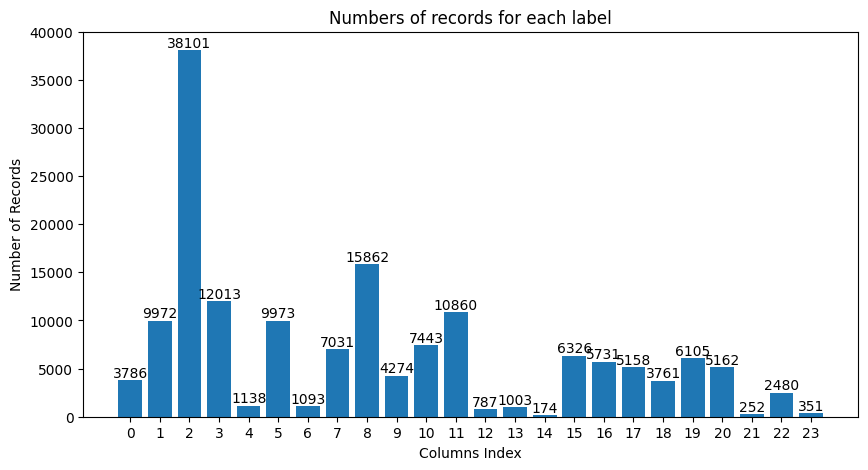

In [75]:
# count label
int_label = np.arange(0,24)
plt.figure(figsize=(10, 5))
bars = plt.bar(int_label, df.iloc[:, 1:].sum())

# Display the count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

plt.xticks(int_label)
plt.xlabel('Columns Index')
plt.ylabel('Number of Records')
plt.title('Numbers of records for each label')
plt.show()


In [76]:
data = []

# Loop through columns and collect label and counts
for column in df.columns[2:]:
    data.append([column, df[column].sum()])

# Create a DataFrame with custom column names
df_summary = pd.DataFrame(data, columns=["Label", "Counts"])

# Print DataFrame
df_summary


,Label,Counts
0,กีดขวาง,9972
1,ถนน,38101
2,ความปลอดภัย,12013
3,คนจรจัด,1138
4,ความสะอาด,9973
5,PM2.5,1093
6,จราจร,7031
7,ทางเท้า,15862
8,ต้นไม้,4274
9,ร้องเรียน,7443


## Balancing Data

In [77]:
df_under = pd.concat([
    resample(df[df['ถนน'].apply(lambda x: x == 1)], replace=False, n_samples=20000, random_state=42),
    df[df['ถนน'] != 1]
])

print('original data shape:', df.shape)
print('under sample data shape:', df_under.shape)

data = []

# Loop through columns and collect label and counts
for column in df_under.columns[2:]:
    data.append([column, df_under[column].sum()])

# Create a DataFrame with custom column names
df_summary = pd.DataFrame(data, columns=["Label", "Counts"])

# Print DataFrame
df_summary



original data shape: (99024, 25)
under sample data shape: (80923, 25)


,Label,Counts
0,กีดขวาง,8745
1,ถนน,20000
2,ความปลอดภัย,9583
3,คนจรจัด,1018
4,ความสะอาด,8605
5,PM2.5,866
6,จราจร,5763
7,ทางเท้า,14448
8,ต้นไม้,3602
9,ร้องเรียน,5957


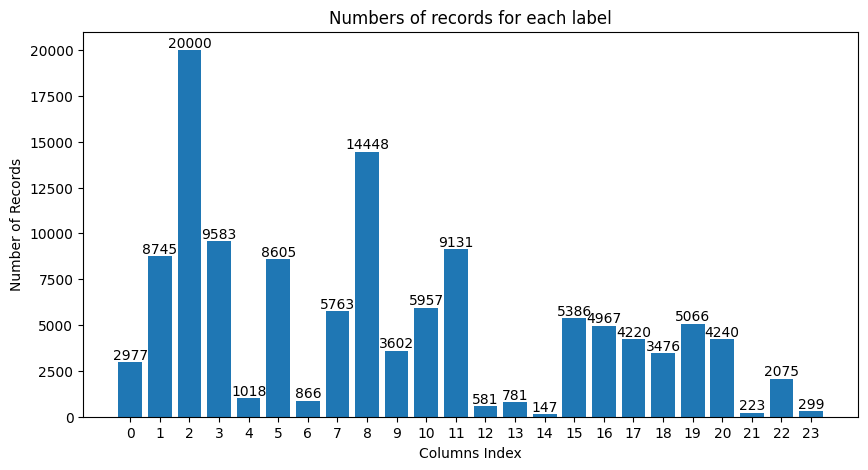

In [78]:
# count label
int_label = np.arange(0,24)
plt.figure(figsize=(10, 5))
bars = plt.bar(int_label, df_under.iloc[:, 1:].sum())

# Display the count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

plt.xticks(int_label)
plt.xlabel('Columns Index')
plt.ylabel('Number of Records')
plt.title('Numbers of records for each label')
plt.show()


# Save Data

In [81]:
df.to_csv('multilabeled_data.csv', index=False)
df_under.to_csv('under_sampled_multilabeled_data.csv', index=False)